In [11]:
from google.colab import files
uploaded=files.upload()



Saving zombies_data - Sheet1.csv to zombies_data - Sheet1 (2).csv


In [12]:
from google.colab import files
uploaded=files.upload()
d=np.loadtxt('zombies_data - Sheet1.csv',delimiter=',',skiprows=1)

Saving zombies_data - Sheet1.csv to zombies_data - Sheet1 (3).csv


training start
training end
w: [7.86606051 5.6538977 ] b: 1.6666161771550203
Runner(25,1) probability: 0.999956628666174
Label: 1


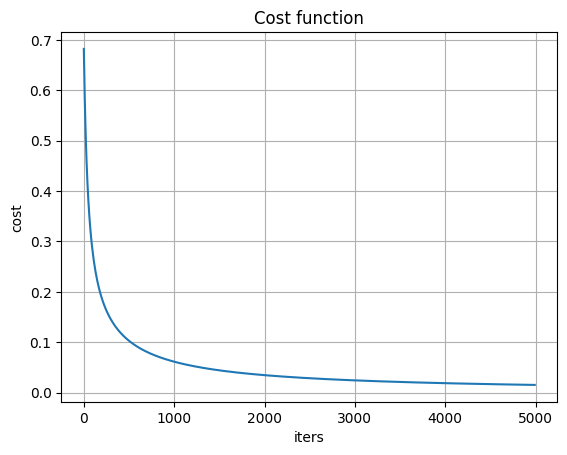

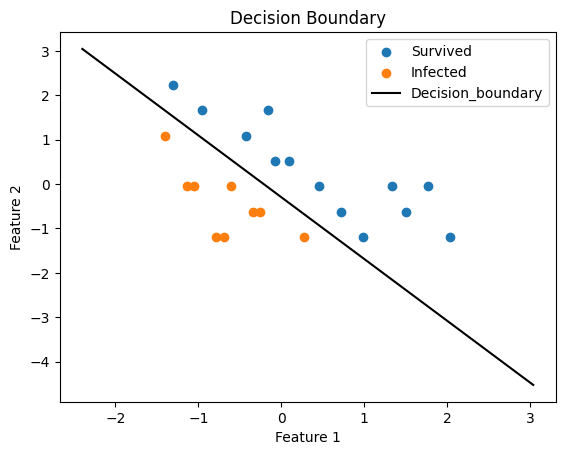

In [13]:
import numpy as np
import matplotlib.pyplot as plt

def sig(z):
    return 1/(1+np.exp(-z))

def cost(x,y,w,b):
    m=len(y)
    h=sig(x.dot(w)+b)
    e=1e-15
    return -(1/m)*np.sum(y*np.log(h+e)+(1-y)*np.log(1-h+e))

def gd(x,y,w,b,lr,it):
    m=len(y)
    J=[]
    for i in range(it):
        z=x.dot(w)+b
        h=sig(z)
        dz=h-y
        w=w-lr*(1/m)*x.T.dot(dz)
        b=b-lr*(1/m)*np.sum(dz)
        if i%10==0:
            J.append(cost(x,y,w,b))
    return w,b,J

d=np.loadtxt('zombies_data - Sheet1.csv',delimiter=',',skiprows=1)


x=d[:,:2]
y=d[:,2]

mu=np.mean(x,axis=0)
s=np.std(x,axis=0)
x=(x-mu)/s

m,n=x.shape
w=np.zeros(n)
b=0.0
lr=0.1
it=5000

print("training start")
w,b,J=gd(x,y,w,b,lr,it)
print("training end")
print("w:",w,"b:",b)

xt=np.array([25.0,1.0])
xt=(xt-mu)/s
p=sig(xt.dot(w)+b)
print("Runner(25,1) probability:",p)
print("Label:",1 if p>=0.5 else 0)

plt.plot(np.arange(0,len(J))*10,J)
plt.xlabel("iters")
plt.ylabel("cost")
plt.title("Cost function")
plt.grid()
plt.show()

c1=x[y==1]
c0=x[y==0]

plt.scatter(c1[:,0],c1[:,1],label='Survived')
plt.scatter(c0[:,0],c0[:,1],label='Infected')

if abs(w[1])>1e-8:
    xs=np.array([np.min(x[:,0])-1,np.max(x[:,0])+1])
    ys=-(w[0]/w[1])*xs-b/w[1]
    plt.plot(xs,ys,'k-',label='Decision_boundary')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.title('Decision Boundary')
plt.show()

